In [ ]:
import numpy as np
import random as rm
import timeit as tt
import statistics as st
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Multiplications:
The total number of multiplications is n * m * k.

Additions:
The total number of additions is n * m * (k-1).

Explaination:
Imagine two matrices like grids laid on top of each other. Each box in the top grid has k numbers, and each box in the bottom grid also has k numbers. To fill a box in the result grid, we multiply and add the corresponding numbers from the top and bottom grids, k times each. Multiplications: We multiply each pair of matching numbers, one from the top box and one from the bottom box, for a total of k multiplications. We do this for every pair in both boxes, filling out the result box. Additions: After finishing all the k multiplications, we add them all together. This gives us the single number that goes in the result box. So, for each box in the final result grid, we do k multiplications and then 1 addition (k-1 in total). And since the final grid has n rows and m columns, we do this whole process n * m times.

Therefore, the total number of multiplications is n * m * k and the total number of additions is n * m * (k-1).

**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [ ]:
# Change matrix dimensions accordingly
n = 6
k = 8
m = 4

# initializing matrices a and b
x = []
for i in range(n):
  col = []
  for j in range(k):
    col.append(rm.randint(1,9))
  x.append(col)

y = []
for i in range(k):
  col = []
  for j in range(m):
    col.append(rm.randint(1,9))
  y.append(col)

# matrix to store the result  
z = []
for i in range(n):
  col = []
  for j in range(m):
    col.append(0)
  z.append(col)

time1 = []
time2 = []

# list method
def f1(a,b,c):
  for i in range (len(a)):
    for j in range (len(b[0])):
      for p in range (len(a[0])):
        c[i][j] += a[i][p]*b[p][j]
  return c

# numpy method
def f2(a,b):
  return np.dot(a,b)

print("a = ", x)
print("b =", y)
print("res1 = ", f1(x,y,z))
print("res2 = ", f2(x,y))

for count in range(1000):
  
  for i in range(n):
    for j in range(m):
      z[i][j] = 0

  t0 = tt.default_timer()
  res1 = f1(x,y,z)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time1.append(time)


  t0 = tt.default_timer() 
  res2 = f2(x,y)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time2.append(time)

# average times
ti1 = sum(time1)/len(time1)
ti2 = sum(time2)/len(time2)
ti1 = round(ti1,3)
ti2 = round(ti2,3)

# sd's
sd1 = st.pstdev(time1)
sd2 = st.pstdev(time2)
sd1 = round(sd1,3)
sd2 = round(sd2,3)

print("list method: ", ti1,"+/-", sd1, " micro sec")
print("numpy method: ", ti2,"+/-", sd2, " micro sec")

NumPy is faster because it's like having a superhero for math in Python. NumPy can do math operations on big chunks of numbers all at once, making it speedy. Using numpy is faster because it can do the calculations in a parallel manner. Imagine you have to do a lot of calculations – NumPy does them in a way that's similar to having many helpers working together, getting things done quickly.

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

The approach of finding the highest element in one pass, the second-highest element in two passes, and so on, is generally not an efficient method for finding the median. The time complexity for finding the median using this method would be O($n$^($\lceil$$n$/2$\rceil$)), which is impractical and inefficient.

A more efficient method for finding the median is to sort the array and then select the middle element. Sorting the array has a time complexity of O($n$$\log(n)$), and finding the middle element in a sorted array can be done in O(1) time.

In [2]:
import numpy as np
import timeit as tt
import random as rm
import statistics as st


# assume odd length array
num = []
nu = 501
for h in range(nu):
  num.append(rm.randint(1,101))
copy = num.copy()
iter = nu//2

# ceil(n/2) passes
def custom_median_method(num):
  for _ in range(iter):
    max = num[0]
    for t in range(1,len(num)):
      if num[t] > max:
        max = num[t]
    num.remove(max)
  max = num[0]
  for t in range(1,len(num)):
    if num[t] > max:
      max = num[t]
  return max

# sorting method
def custom_sort_method():
  num.sort()
  return num[iter]

# numpy.median method
def custom_numpy_method():
  return np.median(num)
  
print(custom_median_method(copy))
print(custom_sort_method())
print(int(custom_numpy_method()))

time3 = []
time4 = []
time5 = []
# time calculation
for count in range(1000):
  copy = num.copy()

  t0 = tt.default_timer()
  r3 = custom_median_method(copy)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time3.append(time)


  t0 = tt.default_timer() 
  r4 = custom_sort_method()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time4.append(time)

  t0 = tt.default_timer() 
  r5 = custom_numpy_method()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time5.append(time)

# average times
ti3 = sum(time3)/len(time3)
ti4 = sum(time4)/len(time4)
ti5 = sum(time5)/len(time5)
ti3 = round(ti3,3)
ti4 = round(ti4,3)
ti5 = round(ti5,3)
# sd's
sd3 = st.pstdev(time3)
sd4 = st.pstdev(time4)
sd5 = st.pstdev(time5)
sd3 = round(sd3,3)
sd4 = round(sd4,3)
sd5 = round(sd5,3)

print("n//2 pass method: ", ti3,"+/-", sd3, " micro sec")
print("sort method: ", ti4,"+/-", sd4, " micro sec")
print("numpy method: ", ti5,"+/-", sd5, " micro sec")

53
53
53
n//2 pass method:  6903.273 +/- 1196.872  micro sec
sort method:  7.221 +/- 9.448  micro sec
numpy method:  164.657 +/- 87.096  micro sec


Answer:\
repeated traversing >> numpy.median() > sort().


**4. What is the gradient of the following function with respect to x and y?\
$x^2$$y$ $+$ $y^3$$sin$($x)$**


wrt $x$, the gradient is $2xy$ $+$ $y^3$$cos(x)$\
wrt $y$, the gradient is $x^2$ $+$ $3y^2$$sin(x)$
therefor gradient of the function is a vector = ($2xy$ $-$ $y^3$$cos(x)$, $x^2$ $+$ $3y^2$$sin(x)$)

**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
import jax.numpy as jnp
from jax import grad, random as rm

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# manual derivatives
def fx(x, y):
    return 2 * x * y + y**3 * jnp.cos(x) + 0.001 * rm.normal()

def fy(x, y):
    return x**2 + 3 * y**2 * jnp.sin(x) + 0.001 * rm.normal()

df_dx = grad(f, argnums=0)
df_dy = grad(f, argnums=1)

for i in range(5):
    x = round(rm.uniform(0.0, 10.0), 2)
    y = round(rm.uniform(0.0, 10.0), 2)
    print(x, y)
    print("wrt x- JAX: ", float(df_dx(x, y)), " manual: ", float(fx(x, y)))
    print("wrt y- JAX: ", float(df_dy(x, y)), " manual: ", float(fy(x, y)))

**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
import sympy as smp

x, y = smp.symbols('x y', real=True)
f = x*2 * y + y*3 * smp.sin(x)

dfdx = smp.diff(f, x)
dfdy = smp.diff(f, y)

print("Gradient with respect to x:")
print(dfdx)

print("Gradient with respect to y:")
print(dfdy)

7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [7]:
college = {
    2022: {'Branch 1': {'Roll Number 1': {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70, 'Science': 80}}},
           'Branch 2': {}},
    2023: {'Branch 1': {}, 'Branch 2': {}},
    2024: {'Branch 1': {}, 'Branch 2': {'Roll Number 3': {'Name': 'P', 'Marks': {'Maths': 80, 'English': 70, 'Science': 90}}}},
    2025: {'Branch 1': {}, 'Branch 2': {}}
}

# Adding another student in 2022, Branch 1
college[2022]['Branch 1']['Roll Number 2'] = {'Name': 'A', 'Marks': {'Maths': 90, 'English': 80, 'Science': 80}}

# Accessing and printing information for 2024, Branch 2
print(college[2024]['Branch 2'])

{'Roll Number 3': {'Name': 'P', 'Marks': {'Maths': 80, 'English': 70, 'Science': 90}}}


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

**$y$ $=$ $x$**

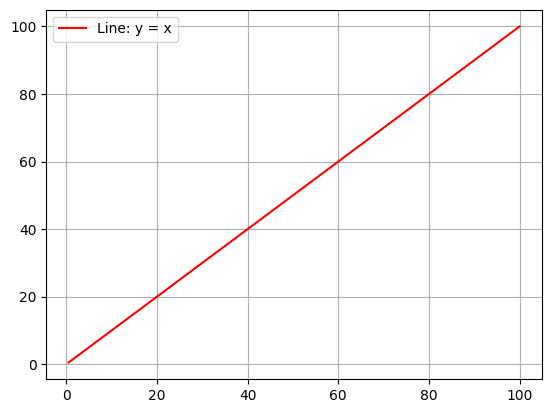

In [9]:
import numpy as np
import matplotlib.pyplot as plt

values_x = np.linspace(0.5, 100, 200)
values_y1 = values_x

plt.plot(values_x, values_y1, '-r', label='Line: y = x')
plt.legend(loc='upper left')
plt.grid()
plt.show()


**$y$ $=$ $x^2$, $y$ $=$ $x^3/100$**

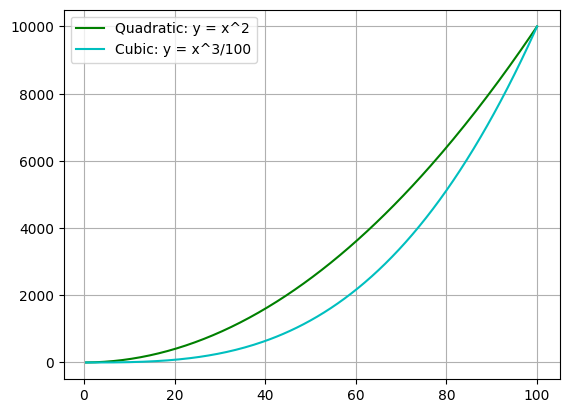

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.linspace(0.5, 100, 200)
data_y2 = data_x * data_x
data_y3 = (data_x ** 3) / 100

plt.plot(data_x, data_y2, '-g', label='Quadratic: y = x^2')
plt.plot(data_x, data_y3, '-c', label='Cubic: y = x^3/100')
plt.legend(loc='upper left')
plt.grid()
plt.show()


**$y$ $=$ $sin(x)$, $y$ $=$ $sin(x)$$/$$x$, $y$ $=$ $log(x)$**

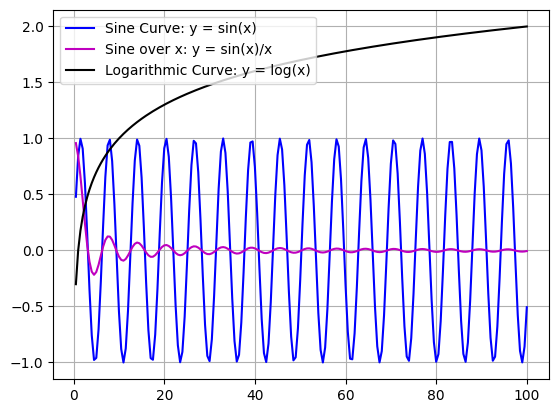

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.5, 100, 200)
sin_values = np.sin(x)
sin_divided_by_x = np.sin(x) / x
logarithmic_values = np.log10(x)

plt.plot(x, sin_values, '-b', label='Sine Curve: y = sin(x)')
plt.plot(x, sin_divided_by_x, '-m', label='Sine over x: y = sin(x)/x')
plt.plot(x, logarithmic_values, '-k', label='Logarithmic Curve: y = log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()


**$y$ $=$ $e^x$**

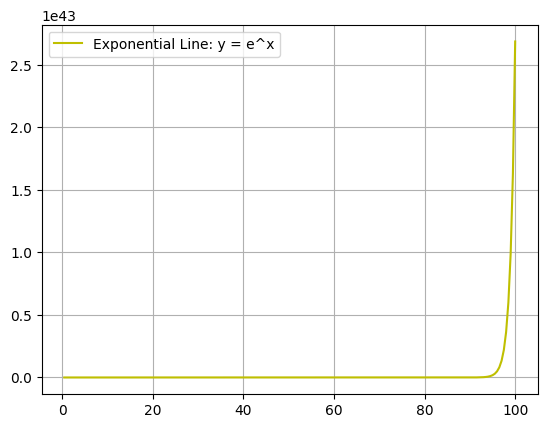

In [13]:
import numpy as np
import matplotlib.pyplot as plt

values_y7 = np.exp(x)
plt.plot(x, values_y7, '-y', label='Exponential Line: y = e^x')
plt.legend(loc='upper left')
plt.grid()
plt.show()


**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [14]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1.0, 2.0, size=(20, 5))
df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])
print("Generated DataFrame:")
print(df)
column_with_highest_std = df.std().idxmax()
print("Column with highest standard deviation: ", column_with_highest_std)
row_with_lowest_mean = df.mean(axis=1).idxmin()
print("Row with lowest mean: ", row_with_lowest_mean)


Generated DataFrame:
           a         b         c         d         e
0   1.081323  1.729777  1.747194  1.862213  1.315926
1   1.988567  1.296838  1.980751  1.218676  1.478495
2   1.143119  1.392392  1.660428  1.564111  1.145541
3   1.568178  1.487414  1.131381  1.629034  1.916942
4   1.685340  1.549214  1.380222  1.421549  1.984763
5   1.184535  1.965077  1.413725  1.486918  1.593902
6   1.087856  1.170107  1.113473  1.791633  1.507110
7   1.061436  1.148628  1.577840  1.879892  1.598365
8   1.261702  1.369687  1.289289  1.818391  1.975216
9   1.992405  1.710059  1.513636  1.452631  1.555806
10  1.981969  1.162226  1.332767  1.312844  1.873551
11  1.530472  1.679405  1.744987  1.181647  1.768403
12  1.946232  1.194629  1.720316  1.912370  1.938761
13  1.305572  1.659157  1.512010  1.775254  1.314914
14  1.399866  1.201579  1.448185  1.048611  1.586914
15  1.808036  1.762310  1.680978  1.590982  1.738754
16  1.702042  1.106436  1.652541  1.488174  1.219357
17  1.139969  1.111419  1

**12. Write a small piece of code to explain broadcasting in numpy.**

In [15]:
import numpy as np

a = np.array([[20.0, 30.0, 40.0],
              [10.0, 20.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])

# Broadcasting: performing addition between a 2D array and a 1D array
result = a + b

print("Array a:")
print(a)
print("\nArray b:")
print(b)
print("\nResult after broadcasting a + b:")
print(result)

Array a:
[[20. 30. 40.]
 [10. 20. 30.]]

Array b:
[1. 2. 3.]

Result after broadcasting a + b:
[[21. 32. 43.]
 [11. 22. 33.]]
